In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

C:\Users\victo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load data using Keras

In [2]:
import tensorflow as tf

# Define parameters
batch_size = 8
img_height = 150
img_width = 150
data_dir = r'C:\Users\victo\Big Data Systems\Project Items\MyNursingHome'

# Create training, validation, and test datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123, # Use same seed for validation and test to ensure they are the same subset
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Print class names
class_names = train_ds.class_names
print("Class names:", class_names)

Found 37500 files belonging to 25 classes.
Using 33750 files for training.
Found 37500 files belonging to 25 classes.
Using 3750 files for validation.
Found 37500 files belonging to 25 classes.
Using 3750 files for validation.
Class names: ['basket_bin', 'bed', 'bench', 'cabinet', 'call_bell', 'cane_stick', 'chair', 'door', 'electric_socket', 'fan', 'fire_extinguisher', 'handrail', 'human_being', 'rack', 'refrigerator', 'shower', 'sink', 'sofa', 'table', 'television', 'toilet_seat', 'walker', 'wardrobe', 'water_dispencer', 'wheelchair']


# Visualize data

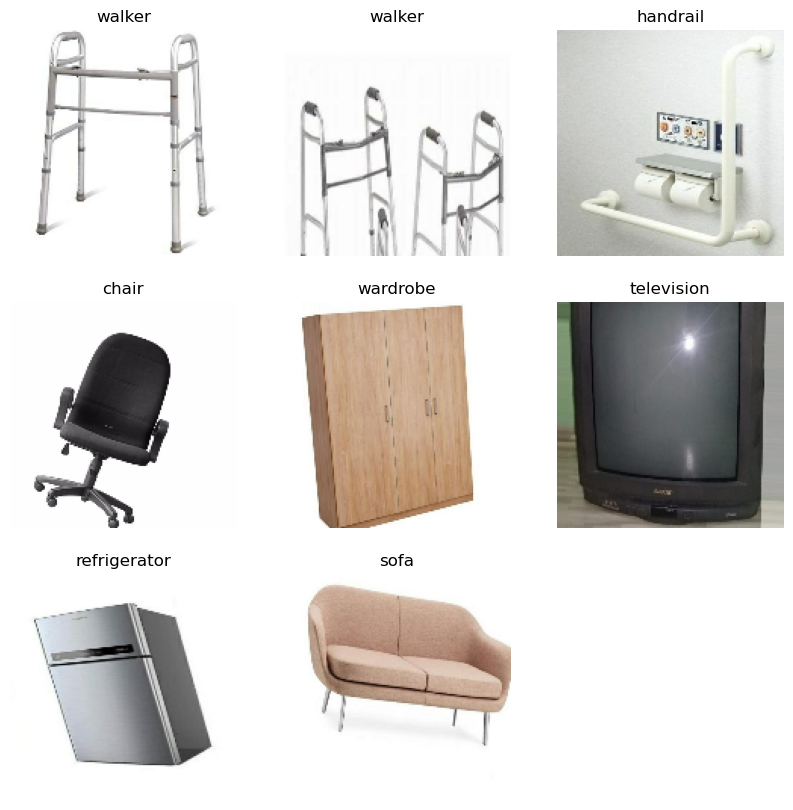

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Build Keras Model

In [5]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [6]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

## Compile the model

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                 

# Training

In [9]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


4219/4219 [==============================] - 240s 55ms/step - loss: 1.8999 - accuracy: 0.4384 - val_loss: 1.2174 - val_accuracy: 0.6333
Epoch 2/10
4219/4219 [==============================] - 217s 51ms/step - loss: 1.2022 - accuracy: 0.6472 - val_loss: 0.9816 - val_accuracy: 0.7024
Epoch 3/10
4219/4219 [==============================] - 212s 50ms/step - loss: 0.9938 - accuracy: 0.7072 - val_loss: 0.8266 - val_accuracy: 0.7547
Epoch 4/10
4219/4219 [==============================] - 217s 51ms/step - loss: 0.8822 - accuracy: 0.7396 - val_loss: 0.7662 - val_accuracy: 0.7755
Epoch 5/10
4219/4219 [==============================] - 217s 51ms/step - loss: 0.8143 - accuracy: 0.7584 - val_loss: 0.8127 - val_accuracy: 0.7632
Epoch 6/10
4219/4219 [==============================] - 215s 51ms/step - loss: 0.7559 - accuracy: 0.7771 - val_loss: 0.8165 - val_accuracy: 0.7712
Epoch 7/10
4219/4219 [==============================] - 227s 54ms/step - loss: 0.7145 - accuracy: 0.7915 - val_loss:

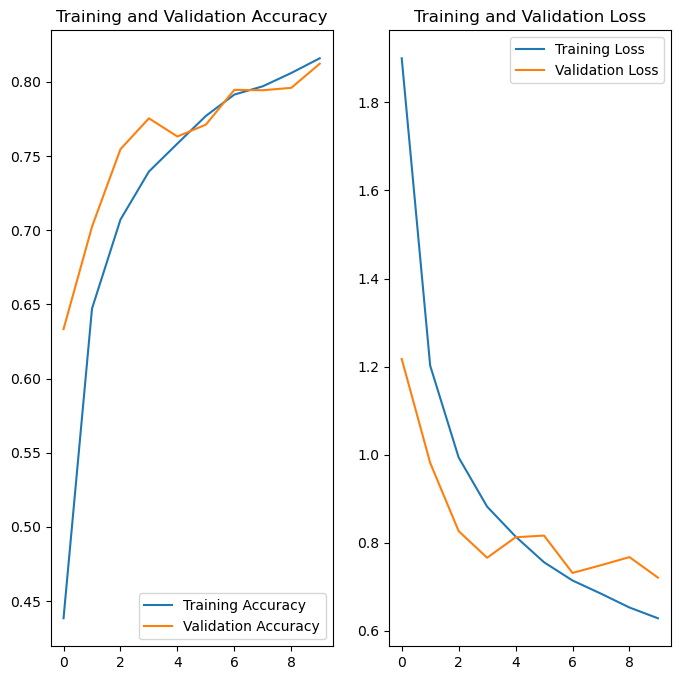

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)

# Print test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

469/469 [==============================] - 8s 15ms/step - loss: 0.7211 - accuracy: 0.8123
Test Loss: 0.7211412191390991
Test Accuracy: 0.8122666478157043


# Convert to TFLite

In [12]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\victo\AppData\Local\Temp\tmpw93gkei2\assets


INFO:tensorflow:Assets written to: C:\Users\victo\AppData\Local\Temp\tmpw93gkei2\assets


In [46]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [14]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_input'], 'outputs': ['outputs']}}

In [42]:
img = tf.keras.preprocessing.image.load_img(r'C:\Users\victo\Big Data Systems\Project Items\MyNursingHome\bed\00001.jpg', target_size=(img_height, img_width)
)

image_array = tf.keras.preprocessing.image.img_to_array(img)
image_array = tf.expand_dims(image_array, axis=0) # Create a batch

In [47]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Allocate tensors
interpreter.allocate_tensors()

image_array = tf.cast(image_array,tf.float32)
interpreter.set_tensor(input_details[0]['index'], image_array)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
predictions = tf.nn.softmax(output_data)

In [49]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions))
)

This image most likely belongs to bed with a 93.28 percent confidence.
